In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
x=np.arange(10,120,10)
y=np.arange(100,210,10)

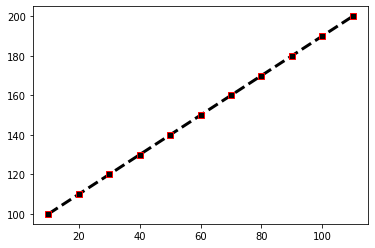

In [ ]:
plt.plot(x,y,marker='s',ls='--',lw=3,mec='r',color='k')

In [ ]:
model=LinearRegression()
x=np.reshape(x,(-1,1))
y=np.reshape(y,(-1,1))

model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yp=model.predict(x)
yp

array([[100.],
       [110.],
       [120.],
       [130.],
       [140.],
       [150.],
       [160.],
       [170.],
       [180.],
       [190.],
       [200.]])

In [ ]:
sqe=(y-yp)**2
sqe

array([[2.01948392e-28],
       [2.01948392e-28],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]])

In [ ]:
area=float(input("Enter area:"))
pv=model.predict([[area]])
pv

Enter area:


ValueError: ignored

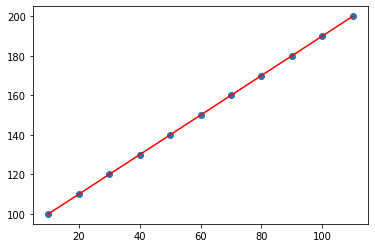

In [ ]:
plt.scatter(x,y)
plt.plot(x,yp,color='r')

In [ ]:
model.intercept_

array([90.])

In [ ]:
model.coef_

array([[1.]])

In [ ]:
ssr=np.sum(sqe)
sst=np.sum((y-np.mean(y))**2)
r2_score=1-(ssr/sst)

In [ ]:
ssr#sum of square of residuals

4.0389678347315804e-28

In [ ]:
sst#sum of square total

11000.0

In [ ]:
r2_score

1.0

In [ ]:
print("Absolute mean error",mean_absolute_error(y,yp))

Absolute mean error 2.5837917664003644e-15


In [ ]:
print("Mean squared error",mean_squared_error(y,yp))

Mean squared error 3.671788940665073e-29


In [ ]:
print("Root mean squared error",np.sqrt(mean_squared_error(y,yp)))

Root mean squared error 6.059528810613143e-15


In [ ]:
np.std(sqe)

7.789040577090127e-29

In [ ]:
np.mean(sqe)

3.671788940665073e-29

In [ ]:
x1=np.arange(-3.14*3.14,3.14*3.14,.05)
y2=np.sin(x1)
y1=np.cos(x1)

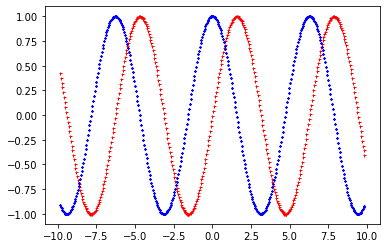

In [ ]:
plt.plot(x1,y2,'r+',ms='3')
plt.plot(x1,y1,'b*',ms='2')

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df_house=pd.read_csv(url,header=None)
df_house

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,RepeatedKFold
data=df_house.values
X,y=data[:,:-1],data[:,-1]
print('Shape of x is', X.shape)
print('Shape of y is',y.shape)

Shape of x is (506, 13)
Shape of y is (506,)


In [ ]:
model=Ridge(alpha=1.0)
#model evaluation
v=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
v

RepeatedKFold(n_repeats=3, n_splits=10, random_state=1)

In [ ]:
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=v,n_jobs=1)
scores

array([-3.68665655, -3.69949707, -2.27418791, -4.47534809, -2.65623368,
       -3.3268799 , -3.05433457, -3.89214328, -3.85509401, -2.81233784,
       -2.70449675, -4.18052658, -3.34038144, -3.49306949, -3.38194947,
       -3.15557217, -4.23368238, -3.51046837, -3.39181011, -2.72686174,
       -3.2293621 , -2.81979252, -3.2054039 , -3.80138383, -4.14962312,
       -3.51704625, -3.54564   , -3.55084967, -2.87993716, -2.90703723])

In [ ]:
scores=np.absolute(scores)
print('Mean : %2f'%(np.mean(scores)))

Mean : 3.381920


In [ ]:
np.std(scores)

0.5190385756523452

In [ ]:
model.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pdata=df_house.iloc[10:11,:-1]
pdata

,0,1,2,3,4,5,6,7,8,9,10,11,12
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45


In [ ]:
model.predict(pdata)

array([18.81422924])

In [ ]:
pdata1=df_house.iloc[10:11,:]
pdata1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [ ]:
pv=model.predict(pdata)[0]
pv-np.mean(scores)

15.432308995754848

In [ ]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe=read_csv(url,header=None)
data=dataframe.values
x,y=data[:,:-1],data[:,-1]

In [ ]:
# define model evaluation method
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=12)

In [ ]:
model=RidgeCV(alphas=arange(0,1,0.01),cv=cv,scoring='neg_mean_absolute_error')
model.fit(x,y)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=12),
        fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_absolute_error', store_cv_values=False)

In [ ]:
# summarize chosen configuration
print('alpha:%f'%model.alpha_)

alpha:0.610000
